In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import MaxNLocator  # Correct import
from sklearn.preprocessing import LabelEncoder

In [13]:
data = pd.read_csv('/content/marketing_campaign.csv',sep="\t")
pd.set_option('display.max_columns', None)

In [ ]:
data.head(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
5,7446,1967,Master,Together,62513.0,0,1,09-09-2013,16,520,42,98,0,42,14,2,6,4,10,6,0,0,0,0,0,0,3,11,0
6,965,1971,Graduation,Divorced,55635.0,0,1,13-11-2012,34,235,65,164,50,49,27,4,7,3,7,6,0,0,0,0,0,0,3,11,0
7,6177,1985,PhD,Married,33454.0,1,0,08-05-2013,32,76,10,56,3,1,23,2,4,0,4,8,0,0,0,0,0,0,3,11,0
8,4855,1974,PhD,Together,30351.0,1,0,06-06-2013,19,14,0,24,3,3,2,1,3,0,2,9,0,0,0,0,0,0,3,11,1
9,5899,1950,PhD,Together,5648.0,1,1,13-03-2014,68,28,0,6,1,1,13,1,1,0,0,20,1,0,0,0,0,0,3,11,0


In [3]:
data.shape

(2240, 29)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [ ]:
data.nunique()

ID                     2240
Year_Birth               59
Education                 5
Marital_Status            8
Income                 1974
Kidhome                   3
Teenhome                  3
Dt_Customer             663
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         558
MntFishProducts         182
MntSweetProducts        177
MntGoldProds            213
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Z_CostContact             1
Z_Revenue                 1
Response                  2
dtype: int64

In [ ]:
data.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

There are 24 NULL values in Income column.  Rest all the columns are not having any null values. There are integer, floating point and string as the data types

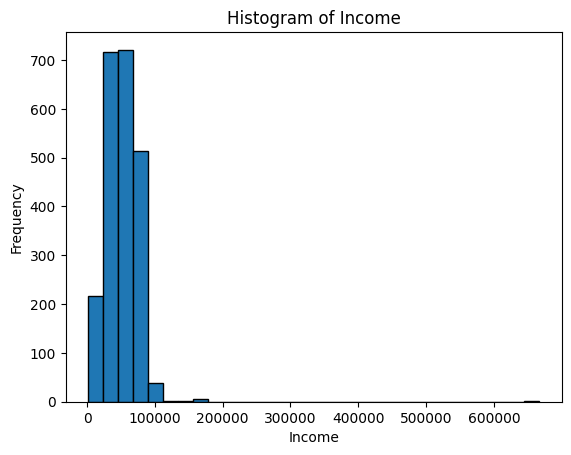

In [ ]:
# Plot the histogram for the 'income' column
plt.hist(data['Income'], bins=30, edgecolor='black')

# Add titles and labels
plt.title('Histogram of Income')
plt.xlabel('Income')
plt.ylabel('Frequency')

# Show the plot
plt.show()

In [14]:
#As the Income is positively skewed, we can fill the missing values with the median value

median_income = data['Income'].median()
data['Income'].fillna(median_income, inplace=True)

**Feature Engineering**

In [15]:
#Age of customer today
data["Age"] = 2024-data["Year_Birth"]

In [16]:
#changing Education values into 3 categories - Graduate, Undergraduate and PostGraduate
data["Education"]=data["Education"].replace({"Basic":"Undergraduate","2n Cycle":"Undergraduate", "Graduation":"Graduate", "Master":"Postgraduate", "PhD":"Postgraduate"})

In [17]:
#changing Marital values into 2 categories - Alone or with Partner
data["Living_status"]=data["Marital_Status"].replace({"Married":"Partner", "Together":"Partner", "Absurd":"Alone", "Widow":"Alone", "YOLO":"Alone",
                                                      "Divorced":"Alone", "Single":"Alone",})

In [18]:
#getting the year the customer registered
data['Year_Customer'] =  data['Dt_Customer'].apply(lambda x: int(x.split('-')[2]))

In [19]:
#Total spendings on various items
data["Spent"] = data["MntWines"]+ data["MntFruits"]+ data["MntMeatProducts"]+ data["MntFishProducts"]+ data["MntSweetProducts"]+ data["MntGoldProds"]

**We can drop the columns which are redundant**

In [20]:
data.drop(columns=['ID', 'Z_CostContact', 'Z_Revenue','Marital_Status'], inplace =True)

In [21]:
data.drop(columns=['Dt_Customer'], inplace =True)

In [22]:
# Drop the specified columns with inplace=True to modify the DataFrame directly
data.drop(columns=['Year_Birth','MntMeatProducts','MntWines','MntFruits','MntFishProducts','MntSweetProducts','MntGoldProds'], inplace=True)

In [9]:
data.isnull().sum()

Education              0
Income                 0
Kidhome                0
Teenhome               0
Recency                0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Response               0
dtype: int64

**Rows duplication**

In [ ]:
#checking the rows duplicate
data[data.duplicated()]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response


In [23]:
data.describe()

,Income,Kidhome,Teenhome,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Year_Customer,Spent
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,52237.975446,0.444196,0.506250,49.109375,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,0.149107,55.194196,2013.028125,605.798214
std,25037.955891,0.538398,0.544538,28.962453,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.356274,11.984069,0.684554,602.249288
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,28.000000,2012.000000,5.000000
25%,35538.750000,0.000000,0.000000,24.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,47.000000,2013.000000,68.750000
50%,51381.500000,0.000000,0.000000,49.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,54.000000,2013.000000,396.000000
75%,68289.750000,1.000000,1.000000,74.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,65.000000,2013.000000,1045.500000
max,666666.000000,2.000000,2.000000,99.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,131.000000,2014.000000,2525.000000


In [24]:
#separate categorial and numerical variables for easy analysis
cat_col = data.select_dtypes(include =["object"]).columns
print(cat_col)

Index(['Education', 'Living_status'], dtype='object')


In [25]:
num_col = data.select_dtypes(exclude =["object"]).columns
print(num_col)
print("number of Numerical:",len(num_col))

Index(['Income', 'Kidhome', 'Teenhome', 'Recency', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response', 'Age',
       'Year_Customer', 'Spent'],
      dtype='object')
number of Numerical: 19


Below Histograms show the frequency of customers across various criteria

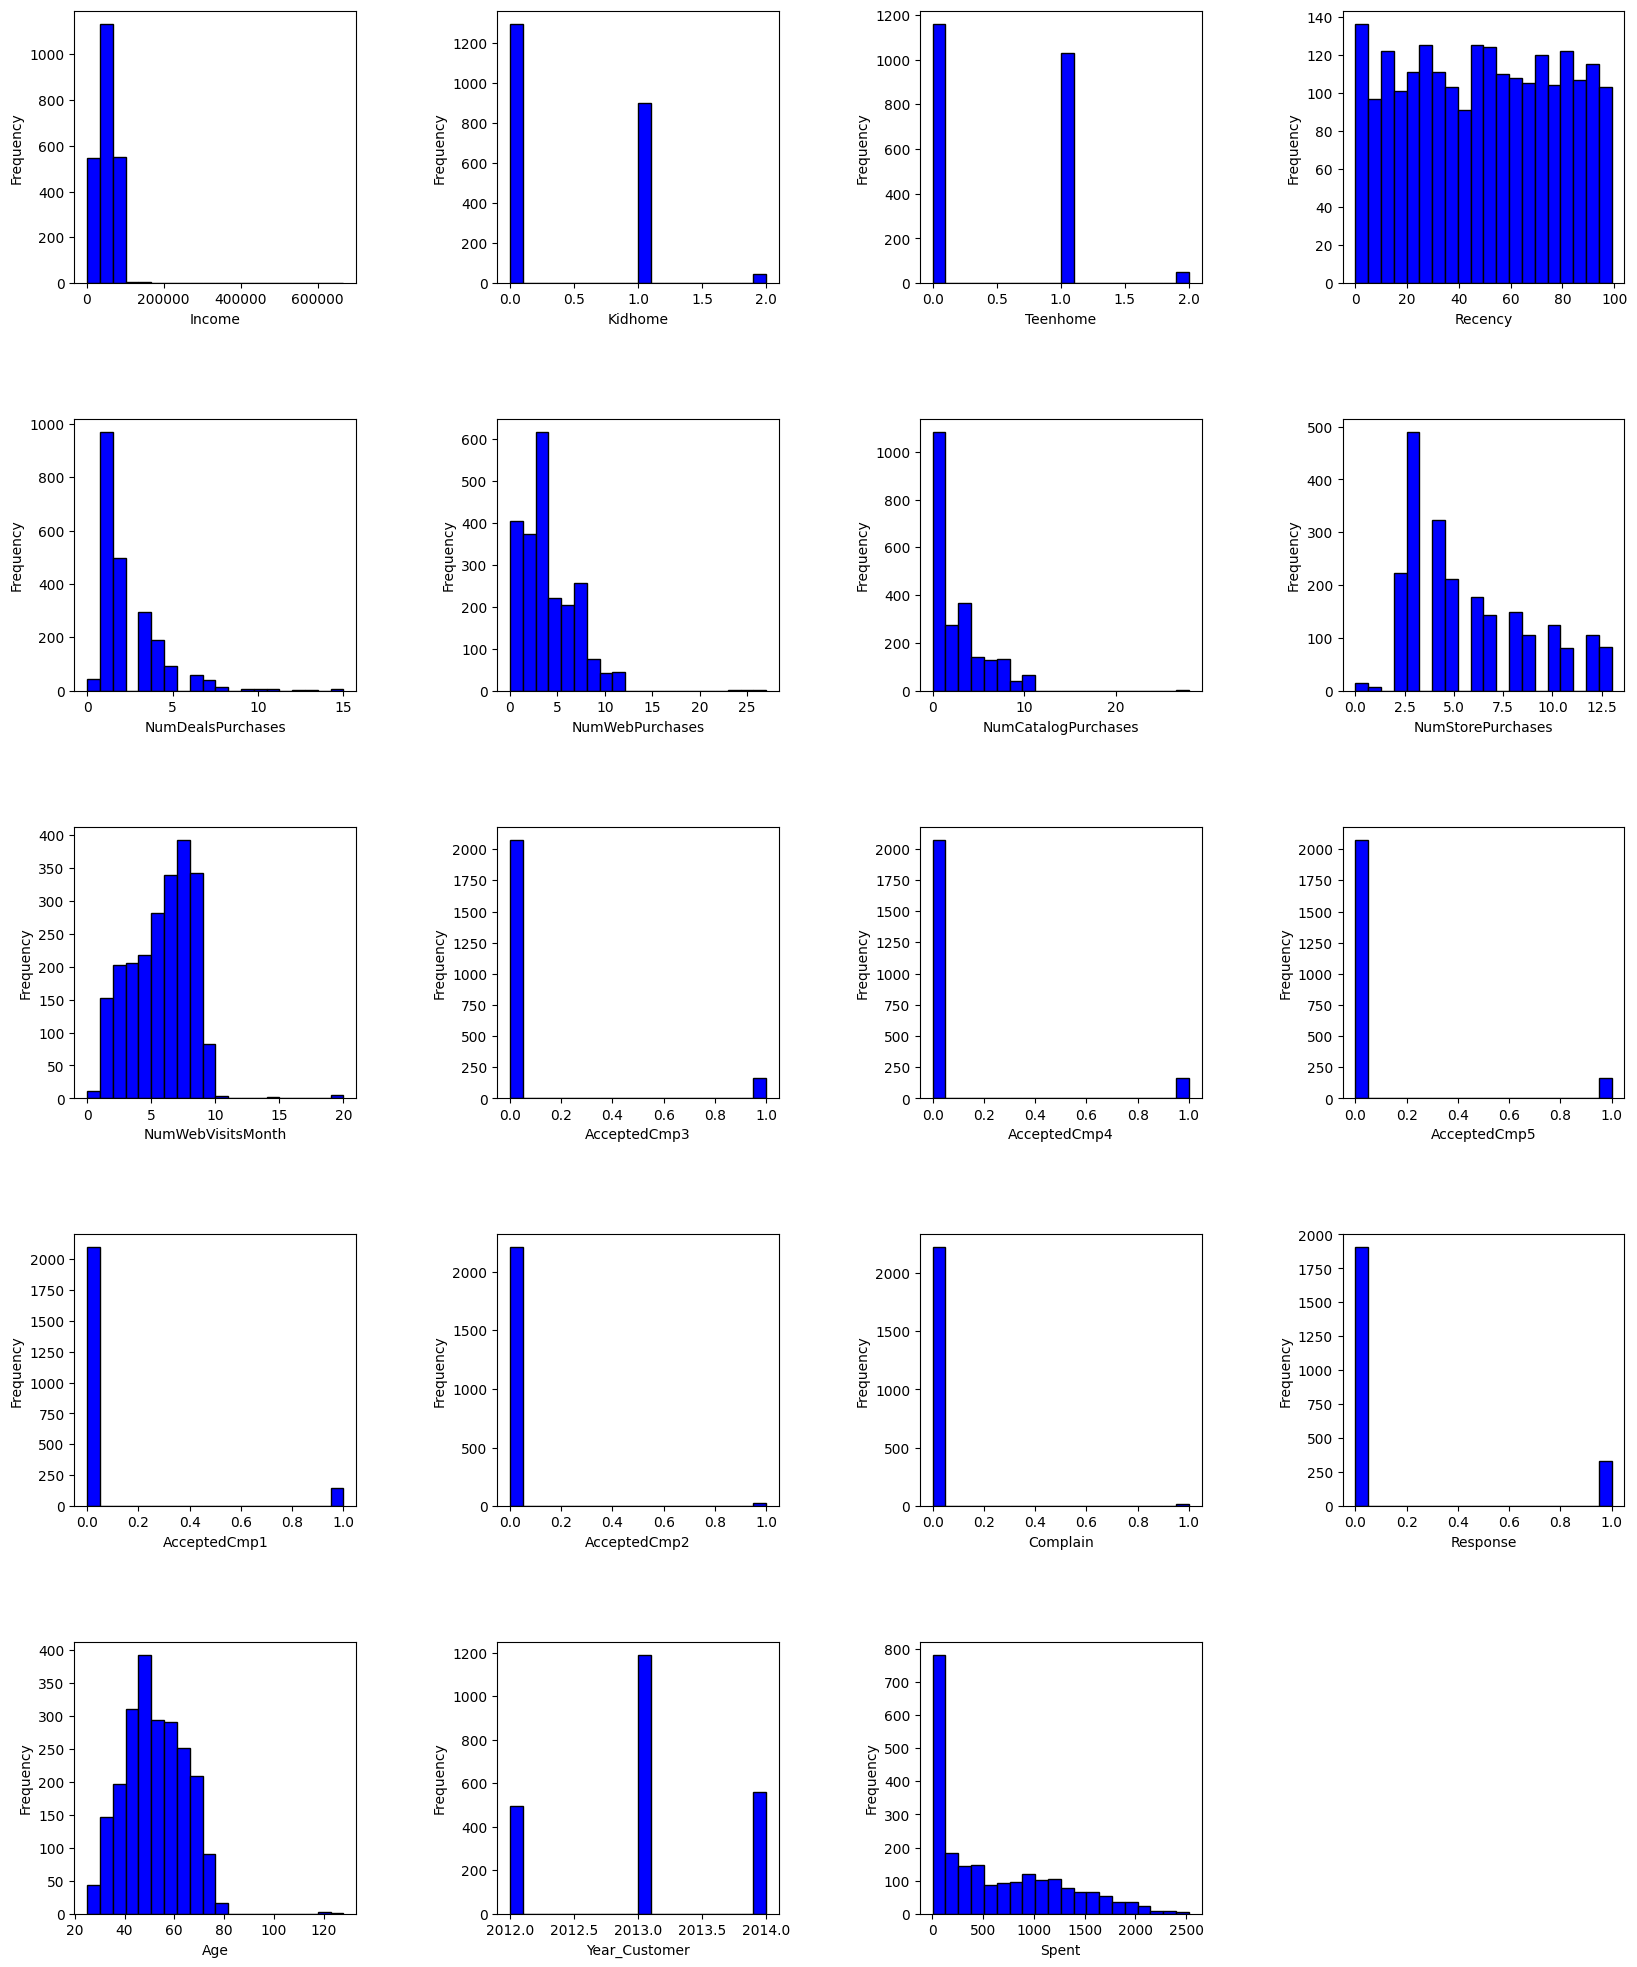

In [ ]:
# Create subplots with a larger figure size
fig, axes = plt.subplots(nrows=6, ncols=4, figsize=(20, 30))

# Flatten the 2D array of subplots to simplify indexing
axes = axes.flatten()

# Plot histograms
for i, col in enumerate(num_col):
    axes[i].hist(data[col], bins=20, color='blue', edgecolor='black')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

# Adjust layout to prevent overlap
plt.subplots_adjust(hspace=0.5, wspace=0.5)

# Hide any unused subplots
for i in range(len(num_col), len(axes)):
    fig.delaxes(axes[i])

# Show the plot
plt.show()

<Axes: xlabel='Education', ylabel='count'>

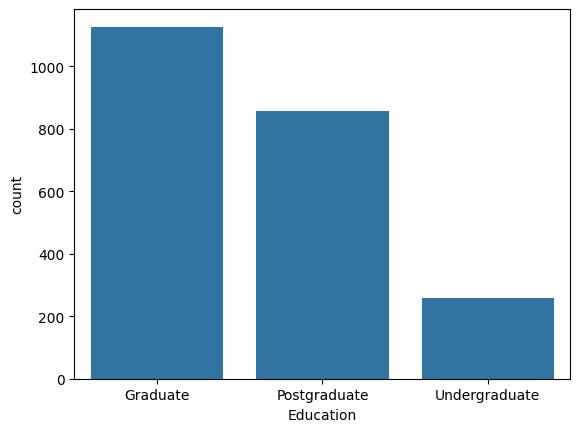

In [ ]:
sns.countplot(x=data['Education'])



**Most customers are Graduates**




<Axes: xlabel='Year_Customer', ylabel='count'>

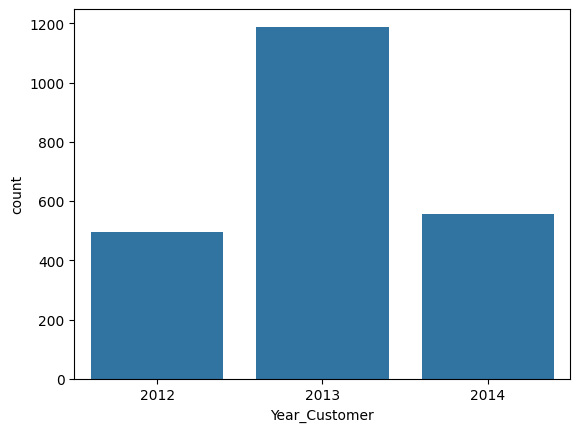

In [ ]:
sns.countplot(x=data['Year_Customer'])

**Most of the customers are members in 2013. There are three years where membership is taken 2012,2013,2014**

<Axes: xlabel='Living_status', ylabel='count'>

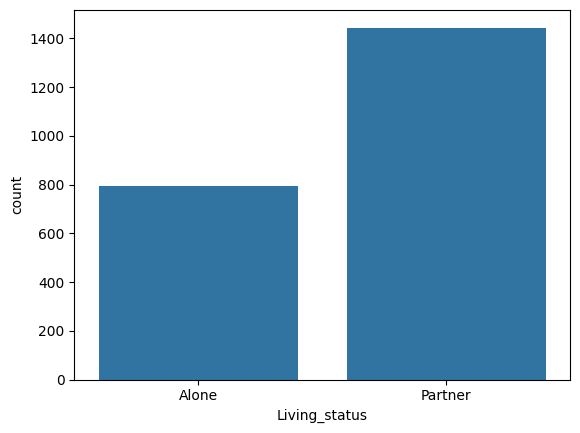

In [ ]:
sns.countplot(x=data['Living_status'])


*   Majority of Customers are Married





In [26]:
from sklearn.preprocessing import LabelEncoder


In [27]:
#separate categorial and numerical variables for easy analysis
cat_col = data.select_dtypes(include =["object"]).columns
print(cat_col)

Index(['Education', 'Living_status'], dtype='object')


In [28]:
# Define a mapping dictionary and encode education based on the 3 types
education_mapping = {'Graduate': 0, 'Postgraduate': 1, 'Undergraduate': 2}
data['Education'] = data['Education'].map(education_mapping)

In [29]:
cat_col = data.select_dtypes(include =["object"]).columns
print(cat_col)

Index(['Living_status'], dtype='object')


In [30]:
num_col = data.select_dtypes(exclude =["object"]).columns
print(num_col)
print("number of Numerical:",len(num_col))

Index(['Education', 'Income', 'Kidhome', 'Teenhome', 'Recency',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Response', 'Age', 'Year_Customer', 'Spent'],
      dtype='object')
number of Numerical: 20


In [31]:
# Define a mapping dictionary and encode Marital status  based on the 2 types
marital_mapping = {'Alone': 0, 'Partner': 1}
data['Living_status'] = data['Living_status'].map(marital_mapping)

In [32]:
# Select only the numerical columns for the correlation matrix
numerical_data = data.select_dtypes(include=['float64', 'int64'])

Text(0.5, 1.0, 'Correlation Heatmap')

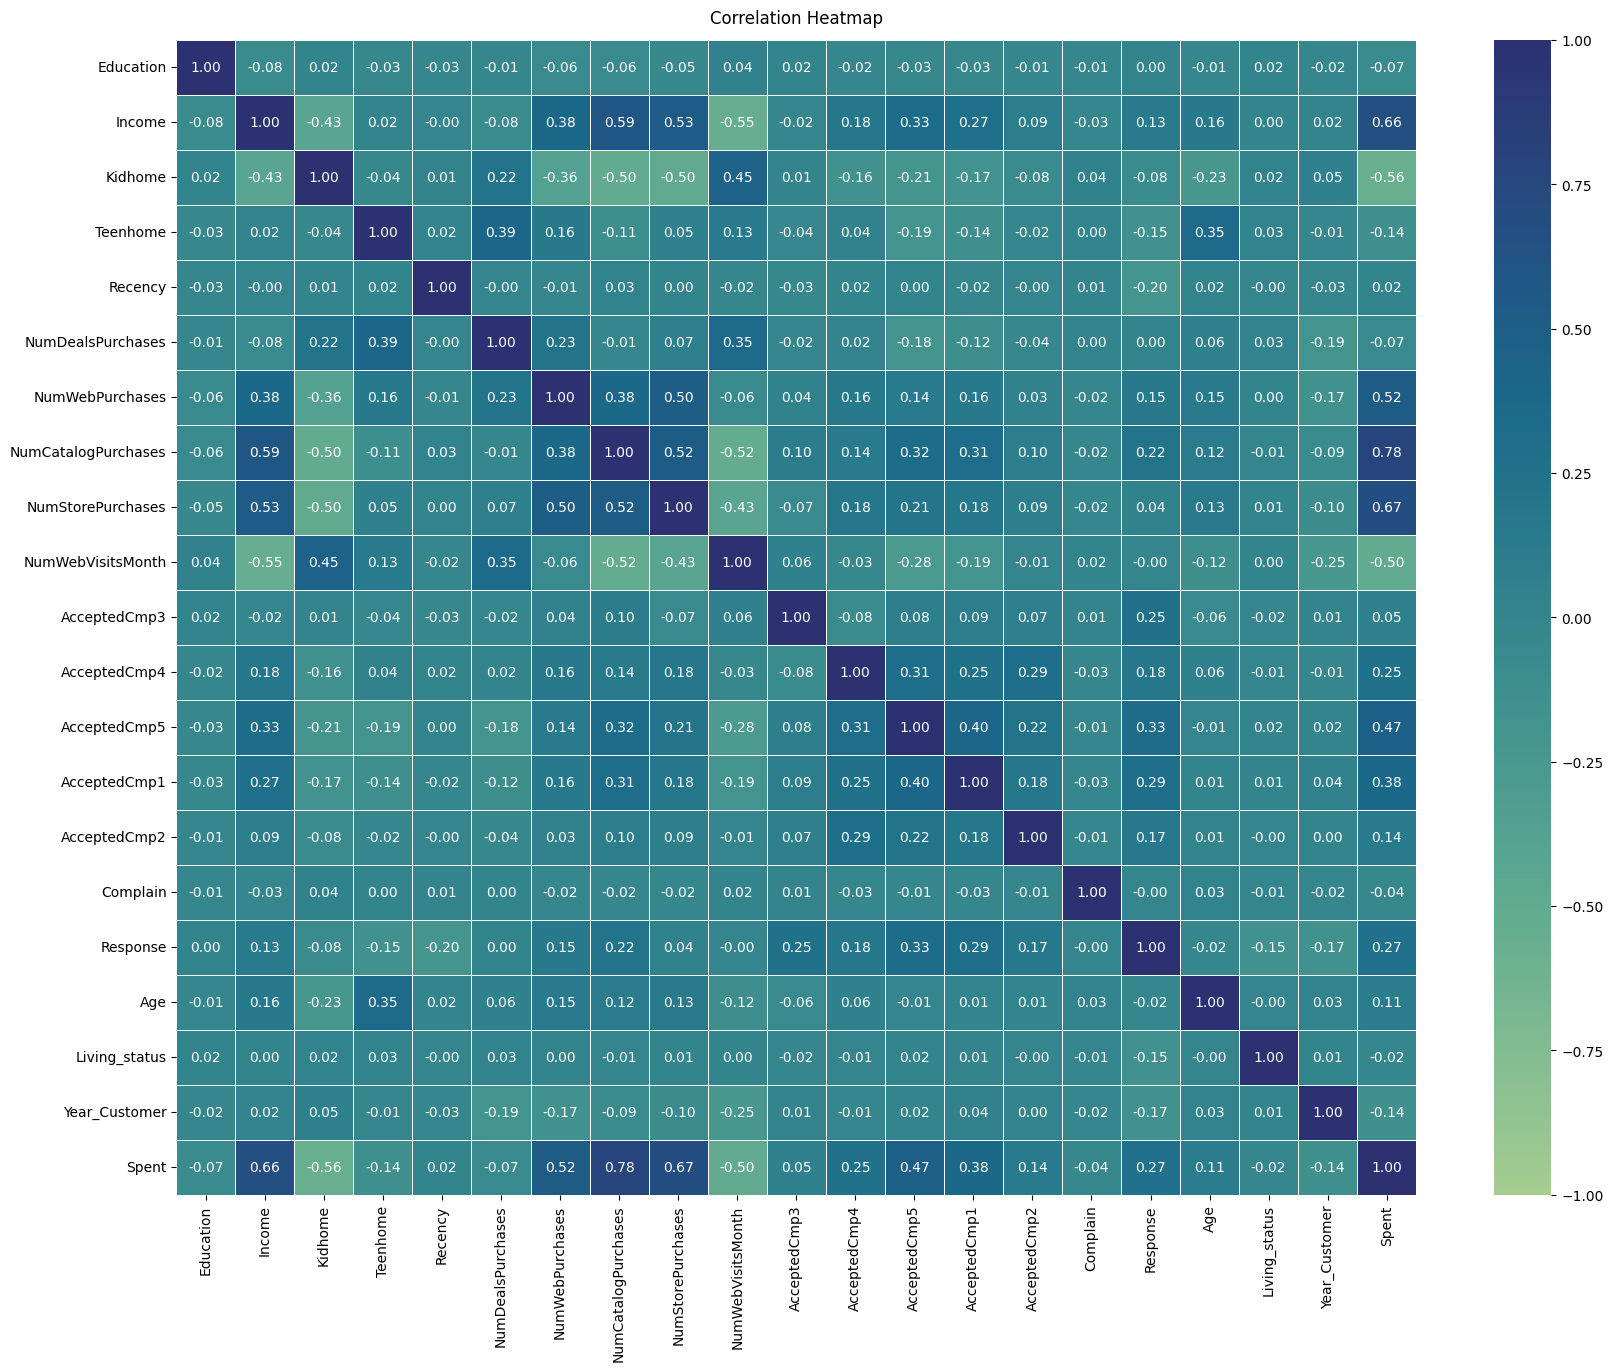

In [33]:
plt.figure(figsize=(20,15))
heatmap = sns.heatmap(numerical_data.corr(),vmin=-1, vmax=1, annot=True, fmt=".2f", linewidth=.5, cmap="crest" )
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

Most of the Customers bought fish,meat,gold etc via Catalog  and Store compared to online purchases. (2) The spent amount is directly propotinal to the income

Skew: 0.67


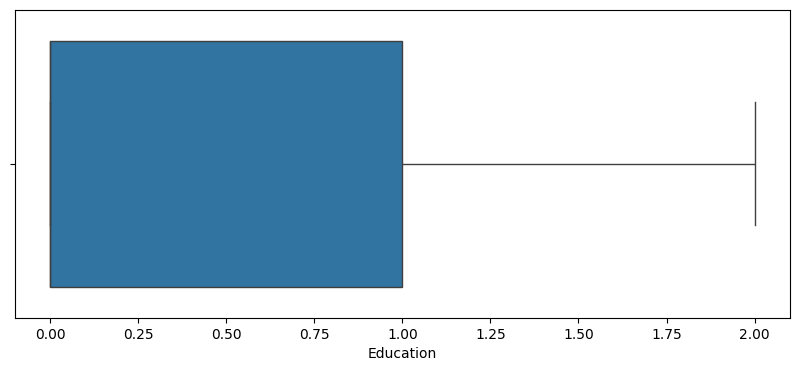

Skew: 6.8


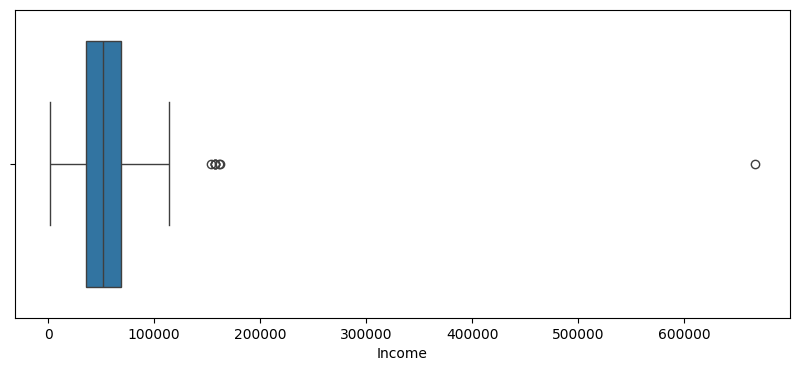

Skew: 0.64


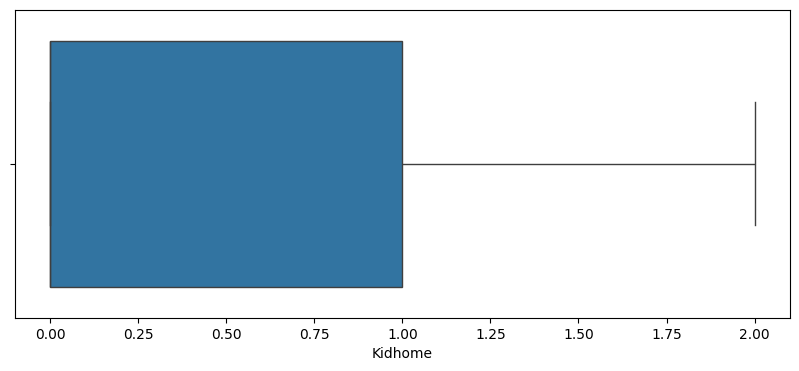

Skew: 0.41


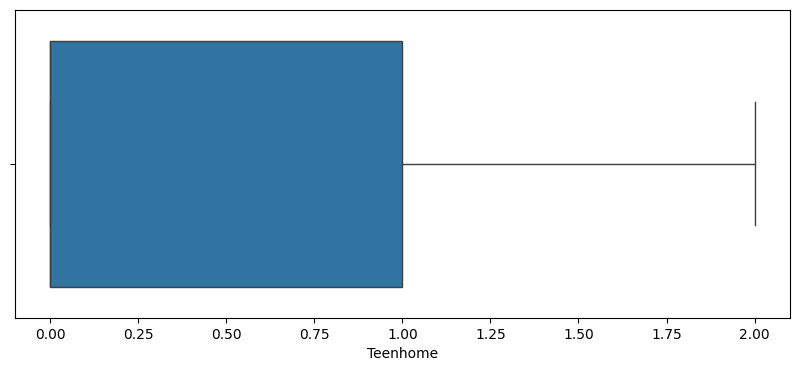

Skew: -0.0


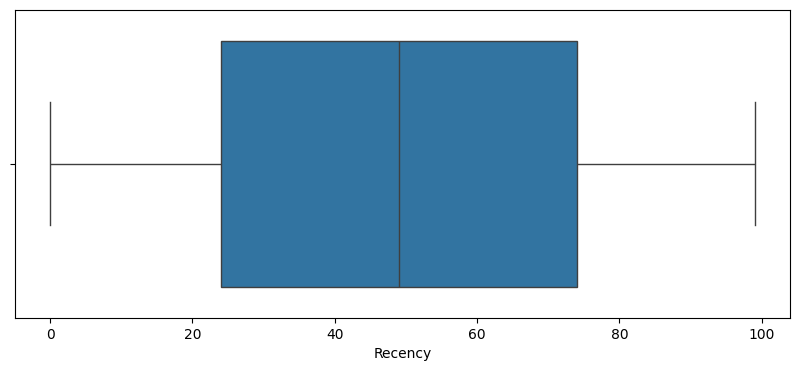

Skew: 2.42


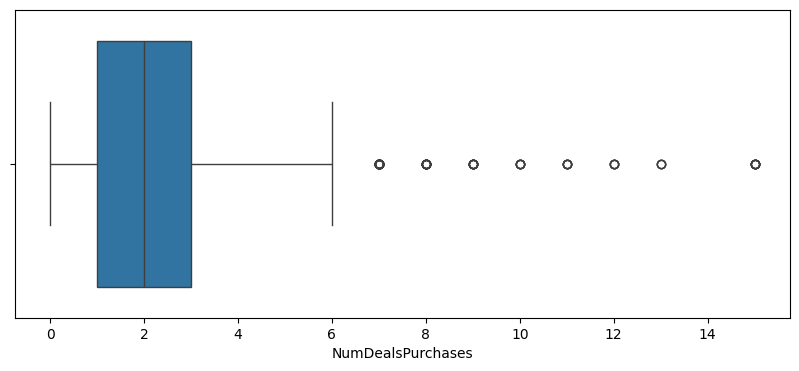

Skew: 1.38


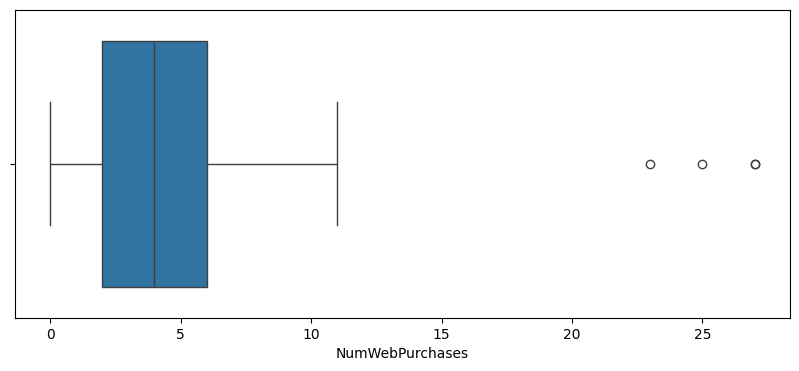

Skew: 1.88


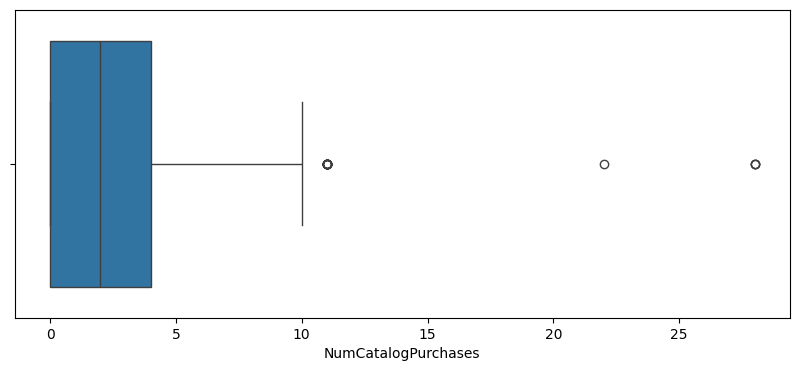

Skew: 0.7


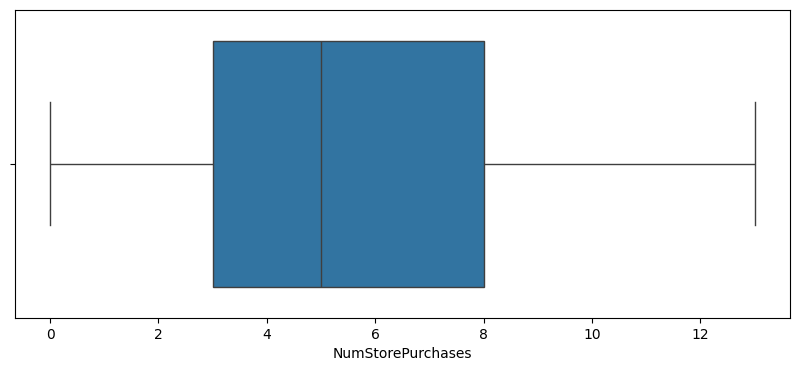

Skew: 0.21


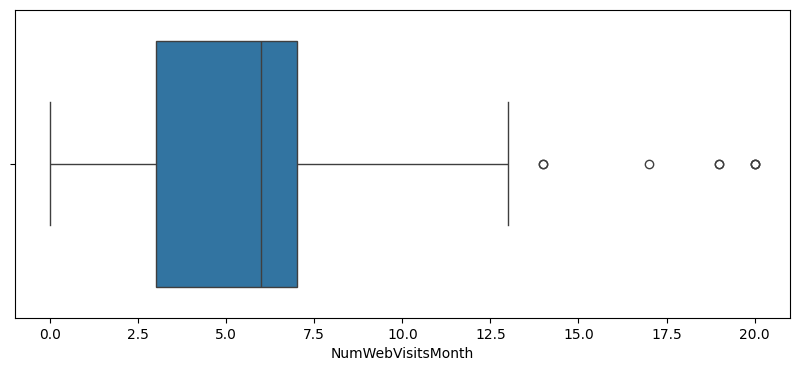

Skew: 3.29


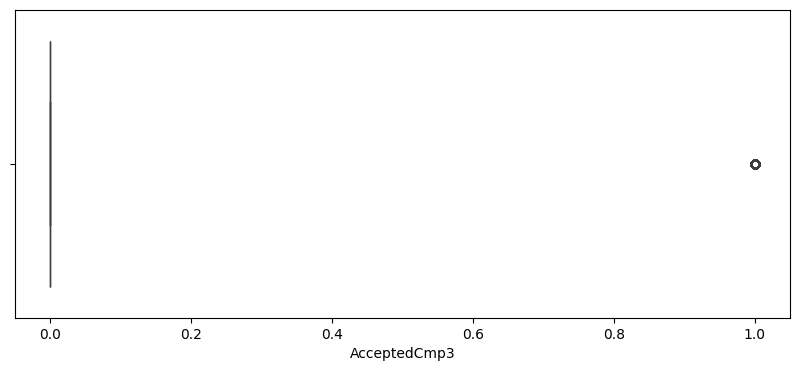

Skew: 3.24


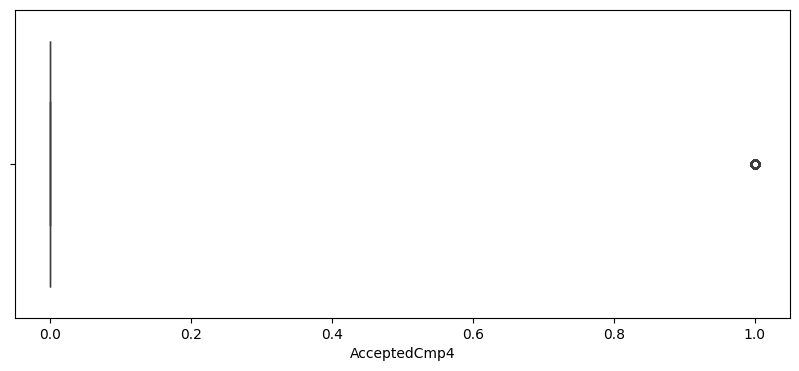

Skew: 3.29


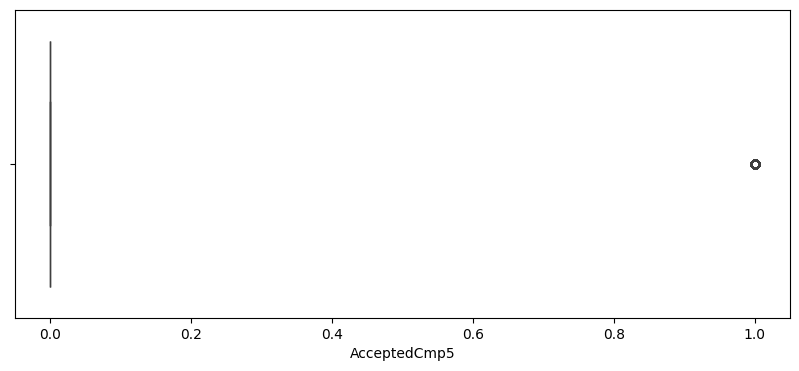

Skew: 3.56


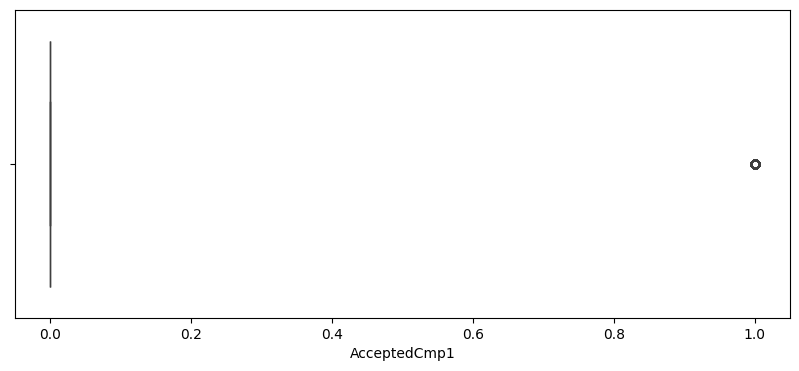

Skew: 8.47


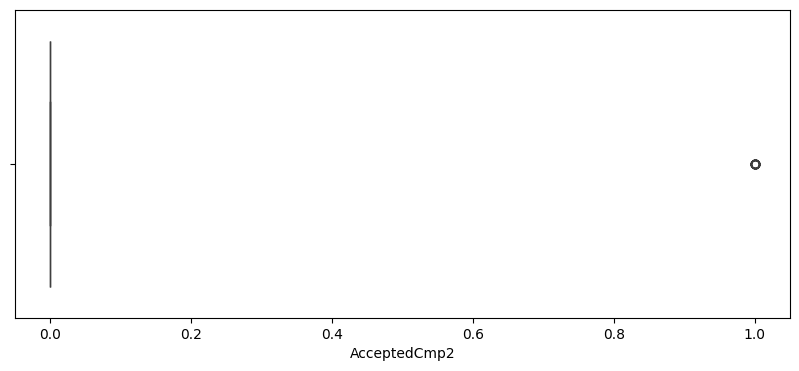

Skew: 10.19


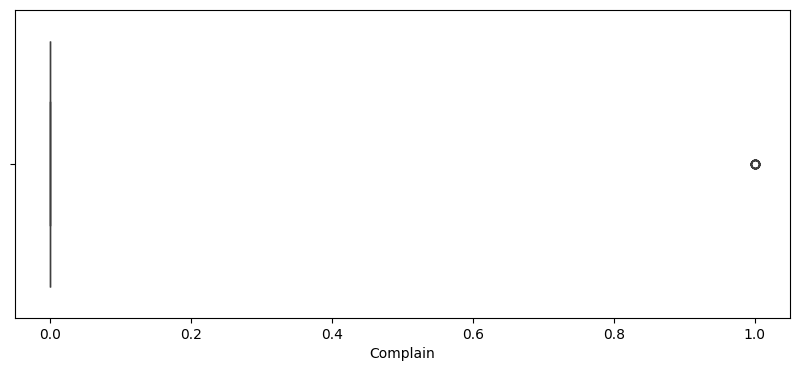

Skew: 1.97


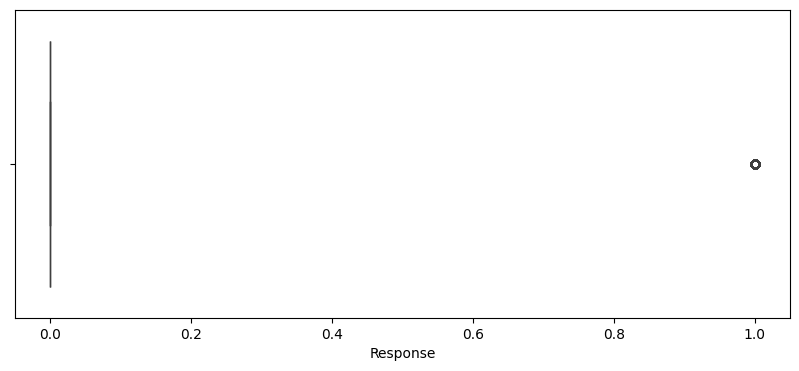

Skew: 0.35


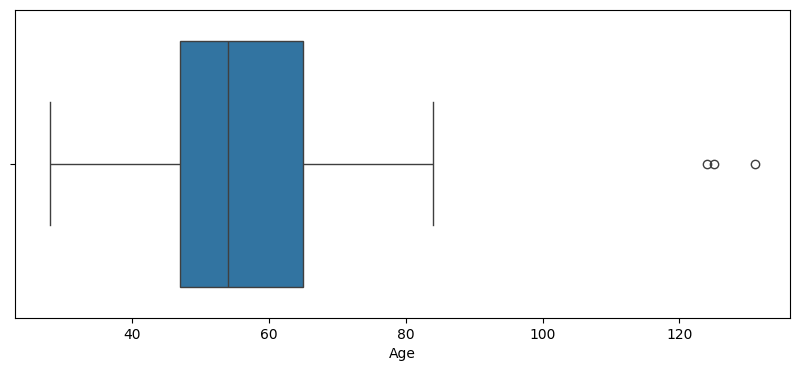

Skew: -0.04


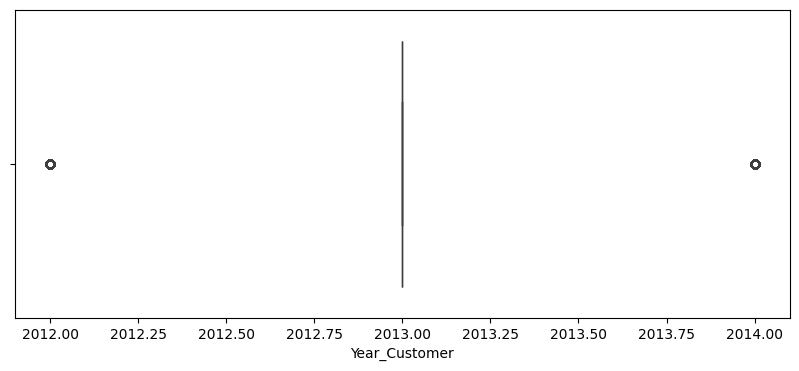

Skew: 0.86


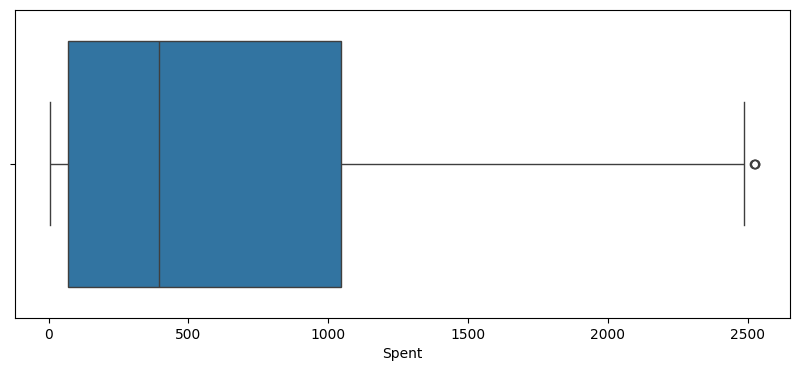

In [34]:
for col in num_col:
  print('Skew:',round(data[col].skew(),2))
  plt.figure(figsize=(10,4))
  sns.boxplot(x=data[col])
  plt.show()

Most of the Customers are come back for purchase ,usually within 23-75 days.

***Removing Outliers ***

In [35]:
#Removing outliers in Age
#outliers for no_of_disqualifications columns
q1 = np.percentile(data['Age'],25,method="midpoint")
q2 = np.percentile(data['Age'],50,method="midpoint")
q3 = np.percentile(data['Age'],75,method="midpoint")
iqr = q3- q1
outlier_ar=[]
up_lim_p = q3+ 1.5*iqr
low_lim_p = q1-1.5*iqr
for x in data['Age']:
  if (x<low_lim_p) or (x>up_lim_p):
    outlier_ar.append(x)
print ('No. of outliers in Age column:', len(outlier_ar))
print (outlier_ar)
print(up_lim_p)

No. of outliers in Age column: 3
[124, 131, 125]
92.0


In [36]:
ind1 = data['Age'] > up_lim_p
data.loc[ind1].index

Index([192, 239, 339], dtype='int64')

In [37]:
data.drop([ 192, 239, 339],inplace=True)

In [38]:
#Removing outliers in Income
#outliers for no_of_disqualifications columns
q1 = np.percentile(data['Income'],25,method="midpoint")
q2 = np.percentile(data['Income'],50,method="midpoint")
q3 = np.percentile(data['Income'],75,method="midpoint")
iqr = q3- q1
outlier_ar=[]
up_lim_p = q3+ 1.5*iqr
low_lim_p = q1-1.5*iqr
for x in data['Income']:
  if (x<low_lim_p) or (x>up_lim_p):
    outlier_ar.append(x)
print ('No. of outliers in Income column:', len(outlier_ar))
print (outlier_ar)
print(up_lim_p)

No. of outliers in Income column: 8
[157243.0, 162397.0, 153924.0, 160803.0, 157733.0, 157146.0, 156924.0, 666666.0]
117418.0


In [39]:
# Find the indices of the outlier values
outlier_indices = data[data['Income'].isin(outlier_ar)].index.tolist()
print("Outlier indices:", outlier_indices)

Outlier indices: [164, 617, 655, 687, 1300, 1653, 2132, 2233]


In [40]:
data.drop([164, 617, 655, 687, 1300, 1653, 2132, 2233],inplace=True)

In [41]:
#Removing outliers in Spent
#outliers for no_of_disqualifications columns
q1 = np.percentile(data['Spent'],25,method="midpoint")
q2 = np.percentile(data['Spent'],50,method="midpoint")
q3 = np.percentile(data['Spent'],75,method="midpoint")
iqr = q3- q1
outlier_ar=[]
up_lim_p = q3+ 1.5*iqr
low_lim_p = q1-1.5*iqr
for x in data['Spent']:
  if (x<low_lim_p) or (x>up_lim_p):
    outlier_ar.append(x)
print ('No. of outliers in Spent column:', len(outlier_ar))
print (outlier_ar)
print(up_lim_p)

No. of outliers in Spent column: 3
[2525, 2524, 2525]
2506.5


In [42]:
# Find the indices of the outlier values
outlier_indices = data[data['Spent'].isin(outlier_ar)].index.tolist()
print("Outlier indices:", outlier_indices)

Outlier indices: [1179, 1492, 1572]


In [43]:
data.drop([1179, 1492, 1572],inplace=True)

In [44]:
#Removing outliers in Num
#outliers for Num web  columns
q1 = np.percentile(data['NumWebVisitsMonth'],25,method="midpoint")
q2 = np.percentile(data['NumWebVisitsMonth'],50,method="midpoint")
q3 = np.percentile(data['NumWebVisitsMonth'],75,method="midpoint")
iqr = q3- q1
outlier_ar=[]
up_lim_p = q3+ 1.5*iqr
low_lim_p = q1-1.5*iqr
for x in data['NumWebVisitsMonth']:
  if (x<low_lim_p) or (x>up_lim_p):
    outlier_ar.append(x)
print ('No. of outliers in NumWebVisitsMonth  column:', len(outlier_ar))
print (outlier_ar)
print(up_lim_p)

No. of outliers in NumWebVisitsMonth  column: 8
[20, 20, 14, 19, 20, 17, 14, 19]
13.0


In [45]:
# Find the indices of the outlier values
outlier_indices_num = data[data['NumWebVisitsMonth'].isin(outlier_ar)].index.tolist()
print("Outlier indices:", outlier_indices_num)

Outlier indices: [9, 774, 981, 1042, 1245, 1328, 1524, 1846]


In [46]:
data.drop([9, 774, 981, 1042, 1245, 1328, 1524, 1846],inplace=True)

In [47]:
#Removing outliers in Num
#outliers for Num web  columns
q1 = np.percentile(data['NumWebPurchases'],25,method="midpoint")
q2 = np.percentile(data['NumWebPurchases'],50,method="midpoint")
q3 = np.percentile(data['NumWebPurchases'],75,method="midpoint")
iqr = q3- q1
outlier_ar=[]
up_lim_p = q3+ 1.5*iqr
low_lim_p = q1-1.5*iqr
for x in data['NumWebPurchases']:
  if (x<low_lim_p) or (x>up_lim_p):
    outlier_ar.append(x)
print ('No. of outliers in NumWebPurchases  column:', len(outlier_ar))
print (outlier_ar)
print(up_lim_p)

No. of outliers in NumWebPurchases  column: 4
[27, 23, 27, 25]
12.0


In [48]:
# Find the indices of the outlier values
outlier_indices_num_web = data[data['NumWebPurchases'].isin(outlier_ar)].index.tolist()
print("Outlier indices:", outlier_indices_num_web)

Outlier indices: [27, 1806, 1898, 1975]


In [49]:
data.drop([27, 1806, 1898, 1975],inplace=True)

In [50]:
#Removing outliers in Num
#outliers for Num web  columns
q1 = np.percentile(data['NumCatalogPurchases'],25,method="midpoint")
q2 = np.percentile(data['NumCatalogPurchases'],50,method="midpoint")
q3 = np.percentile(data['NumCatalogPurchases'],75,method="midpoint")
iqr = q3- q1
outlier_ar=[]
up_lim_p = q3+ 1.5*iqr
low_lim_p = q1-1.5*iqr
for x in data['NumCatalogPurchases']:
  if (x<low_lim_p) or (x>up_lim_p):
    outlier_ar.append(x)
print ('No. of outliers in NumCatalogPurchases  column:', len(outlier_ar))
print (outlier_ar)
print(up_lim_p)

No. of outliers in NumCatalogPurchases  column: 19
[28, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11]
10.0


In [51]:
# Find the indices of the outlier values
outlier_indices_num_cat = data[data['NumCatalogPurchases'].isin(outlier_ar)].index.tolist()
print("Outlier indices:", outlier_indices_num_cat)

Outlier indices: [21, 104, 288, 586, 591, 627, 636, 764, 777, 934, 984, 1212, 1452, 1465, 1745, 1828, 1906, 1940, 1958]


In [52]:
data.drop([21, 104, 288, 586, 591, 627, 636, 764, 777, 934, 984, 1212, 1452, 1465, 1745, 1828, 1906, 1940, 1958],inplace=True)

**Checking if there ar more Outliers**

Skew: 0.67


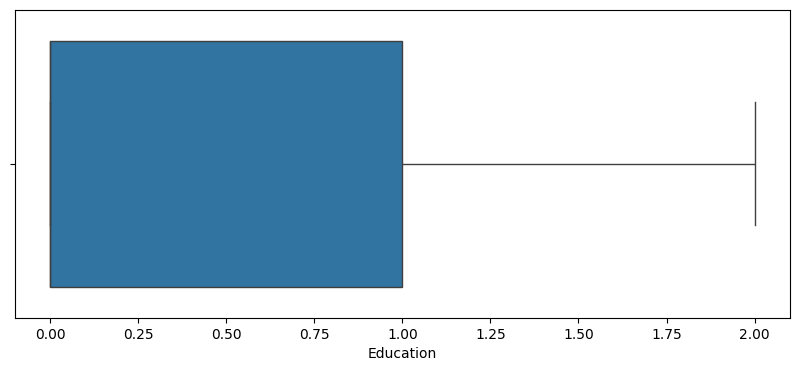

Skew: 0.04


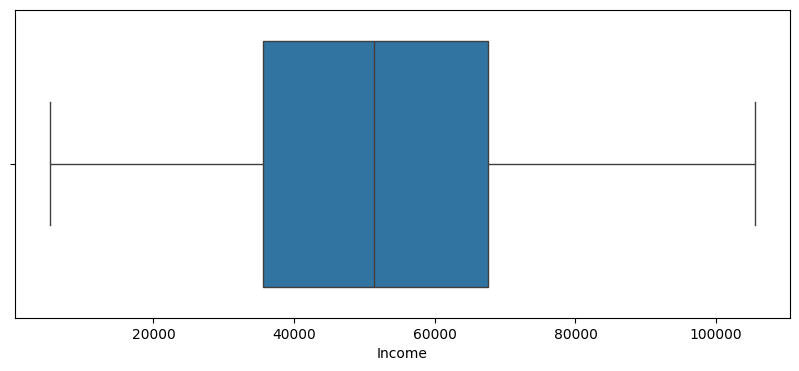

Skew: 0.62


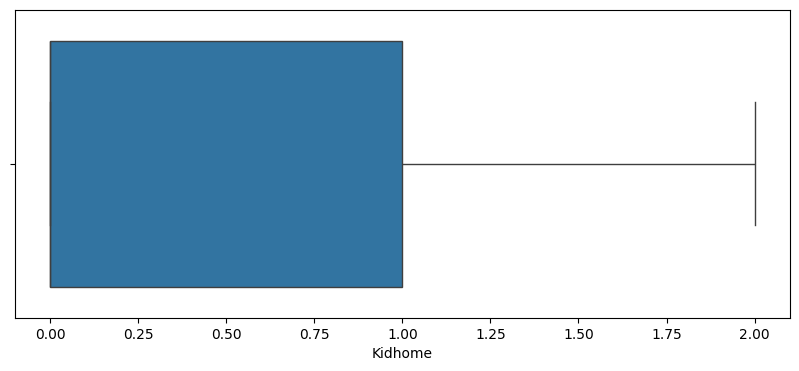

Skew: 0.39


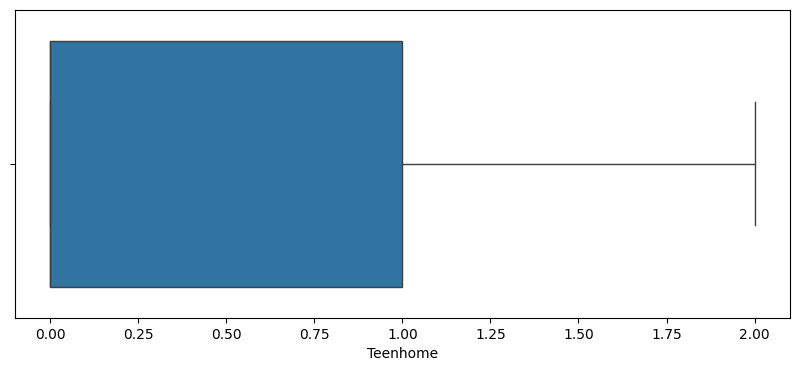

Skew: -0.01


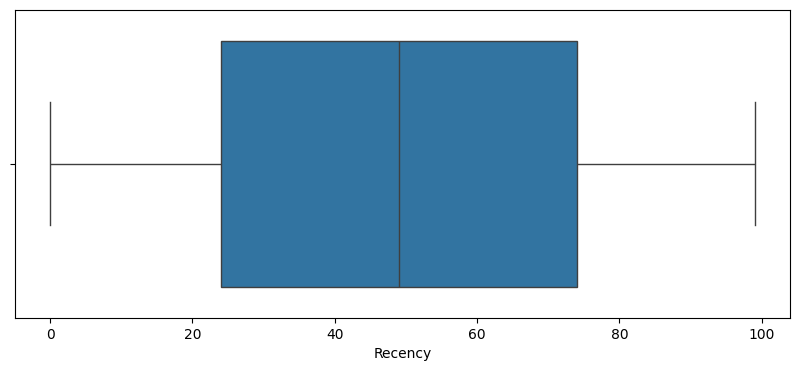

Skew: 2.06


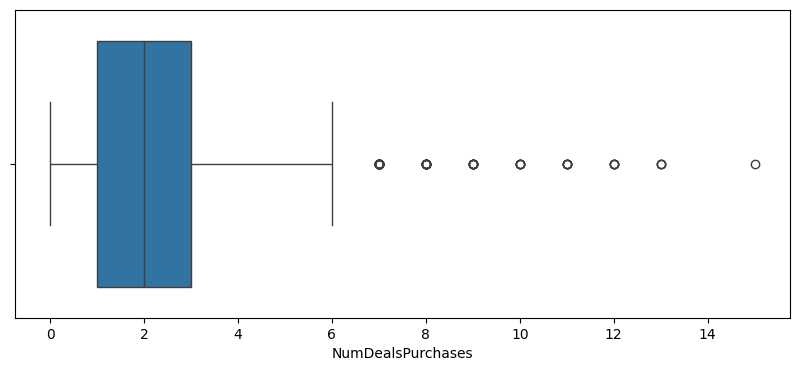

Skew: 0.7


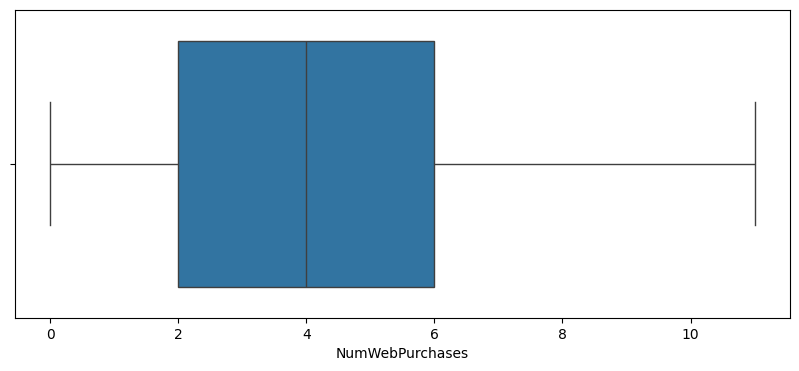

Skew: 1.05


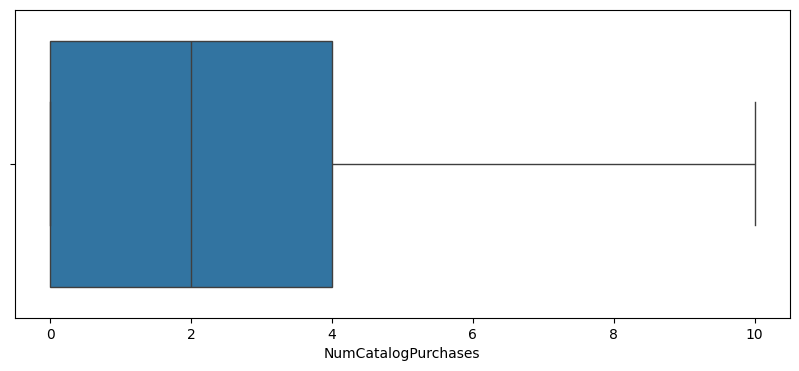

Skew: 0.73


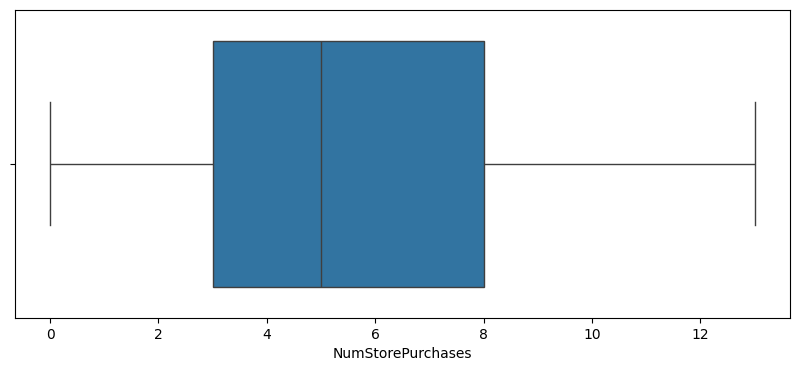

Skew: -0.35


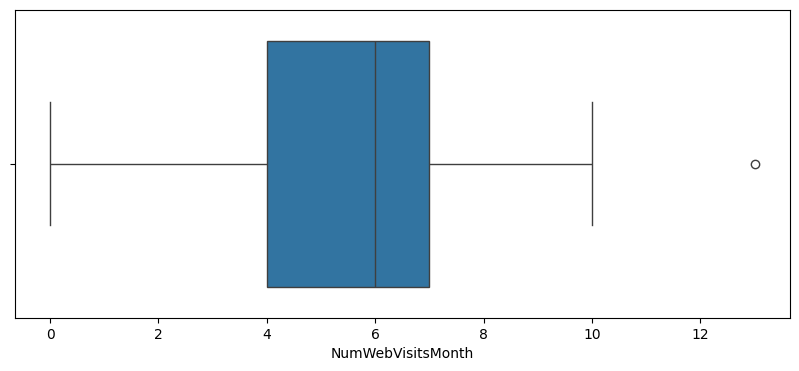

Skew: 3.31


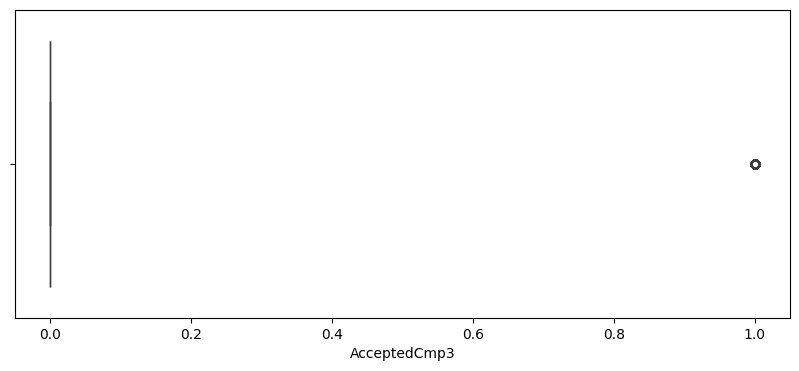

Skew: 3.2


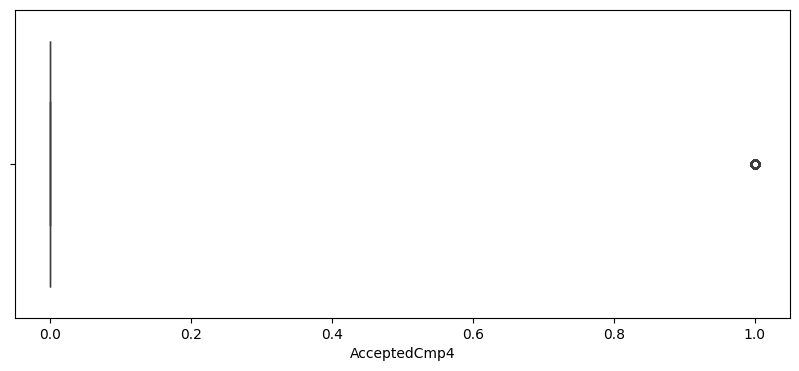

Skew: 3.37


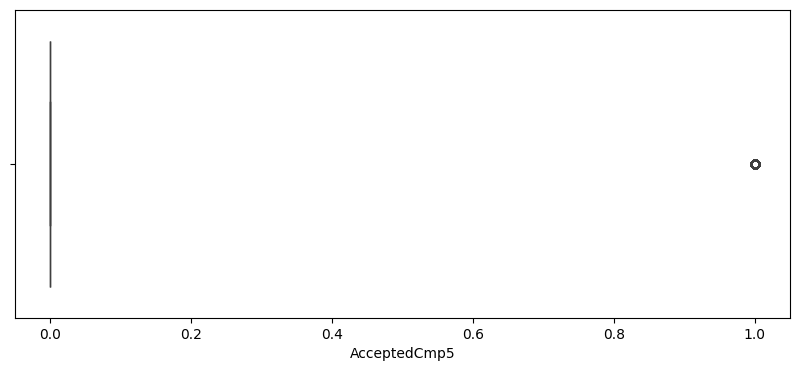

Skew: 3.59


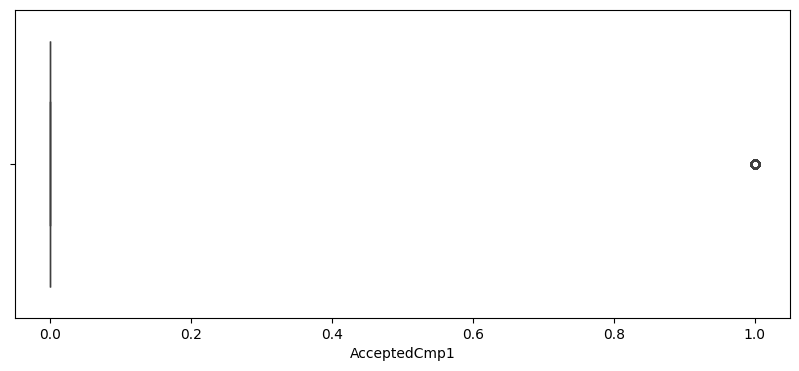

Skew: 8.38


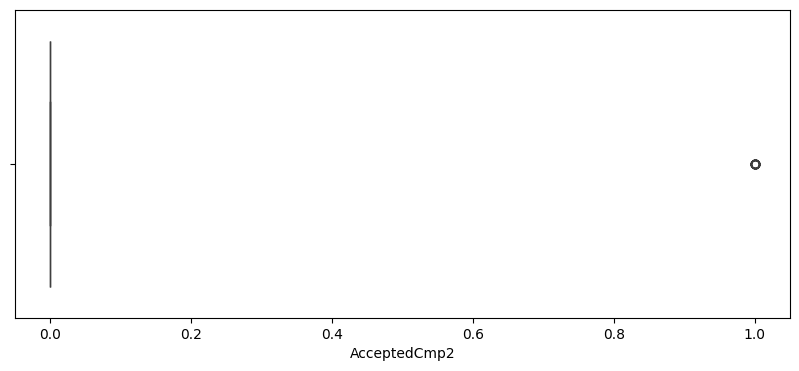

Skew: 10.34


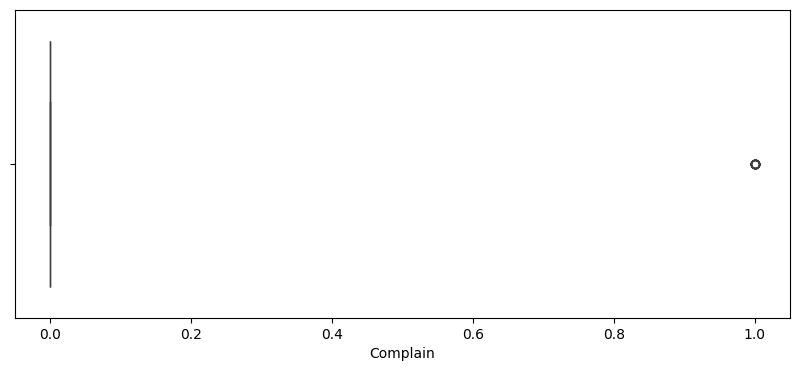

Skew: 1.99


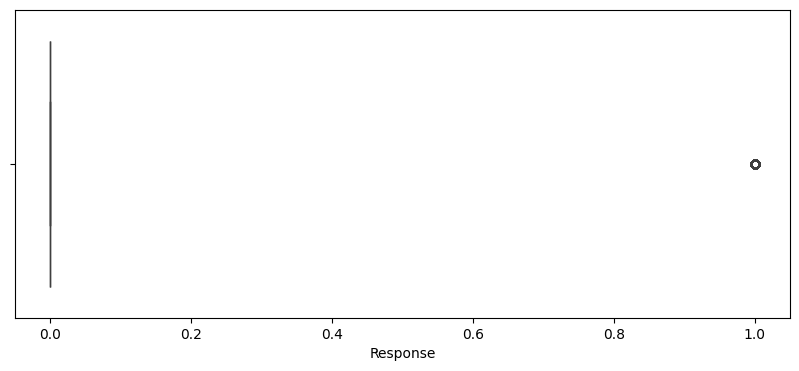

Skew: 0.1


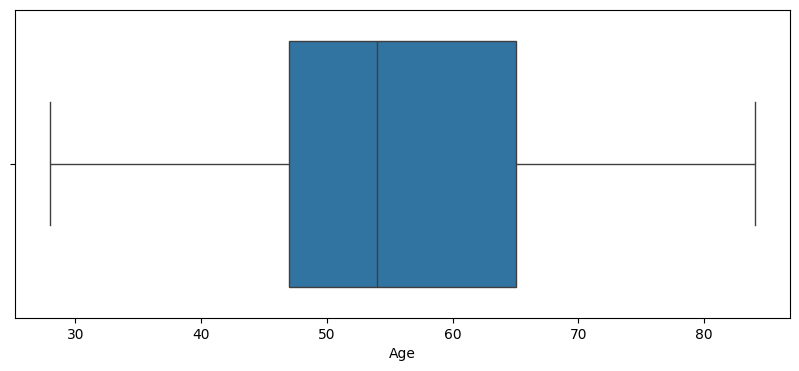

Skew: -0.03


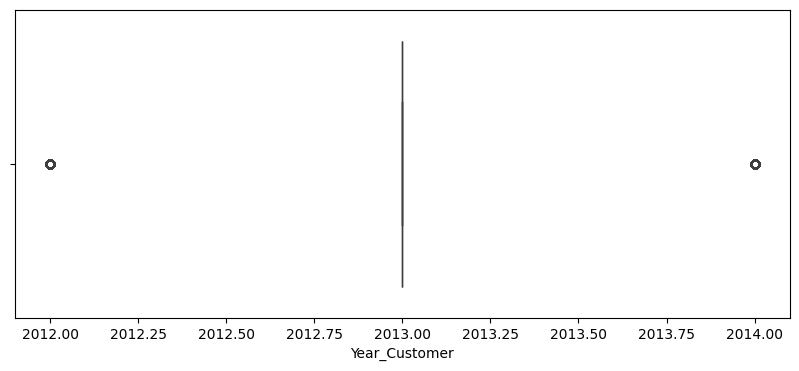

Skew: 0.86


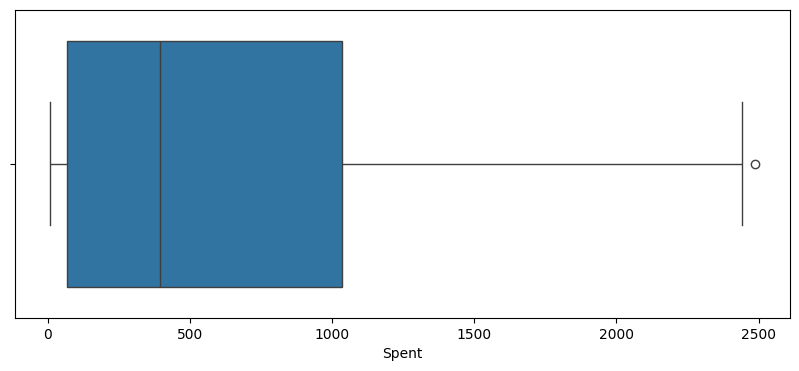

In [53]:
for col in num_col:
  print('Skew:',round(data[col].skew(),2))
  plt.figure(figsize=(10,4))
  sns.boxplot(x=data[col])
  plt.show()

In [ ]:
record_223 = data.iloc[655]
print(record_223)

Education                  1.0
Income                 73059.0
Kidhome                    0.0
Teenhome                   1.0
Recency                   36.0
NumDealsPurchases          1.0
NumWebPurchases            9.0
NumCatalogPurchases        3.0
NumStorePurchases         13.0
NumWebVisitsMonth          4.0
AcceptedCmp3               0.0
AcceptedCmp4               0.0
AcceptedCmp5               0.0
AcceptedCmp1               0.0
AcceptedCmp2               0.0
Complain                   0.0
Response                   0.0
Age                       74.0
Living_status              1.0
Year_Customer           2013.0
Spent                   1095.0
Name: 658, dtype: float64


In [ ]:
ind1 = data['Income'] > up_lim_p
data.loc[ind1].index

Index([164, 617, 655, 687, 1300, 1653, 2132, 2233], dtype='int64')

In [ ]:
data.shape

(2226, 21)

In [54]:
data.shape

(2195, 21)

In [55]:
data.describe()

,Education,Income,Kidhome,Teenhome,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Living_status,Year_Customer,Spent
count,2195.000000,2195.000000,2195.000000,2195.000000,2195.000000,2195.000000,2195.000000,2195.000000,2195.000000,2195.000000,2195.000000,2195.000000,2195.000000,2195.000000,2195.000000,2195.000000,2195.000000,2195.000000,2195.000000,2195.000000,2195.000000
mean,0.613212,51561.296811,0.449203,0.510706,49.120273,2.312984,4.071526,2.564920,5.833713,5.326196,0.071982,0.076082,0.070159,0.063326,0.013667,0.009112,0.147608,55.087016,0.646925,2013.024601,598.432802
std,0.685378,20248.132073,0.539711,0.544509,28.953411,1.818318,2.619763,2.645708,3.227920,2.275112,0.258517,0.265190,0.255474,0.243603,0.116133,0.095041,0.354792,11.668163,0.478035,0.684065,595.288806
min,0.000000,5305.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,28.000000,0.000000,2012.000000,8.000000
25%,0.000000,35533.500000,0.000000,0.000000,24.000000,1.000000,2.000000,0.000000,3.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,47.000000,0.000000,2013.000000,68.500000
50%,0.000000,51381.500000,0.000000,0.000000,49.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,54.000000,1.000000,2013.000000,393.000000
75%,1.000000,67541.000000,1.000000,1.000000,74.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,65.000000,1.000000,2013.000000,1033.000000
max,2.000000,105471.000000,2.000000,2.000000,99.000000,15.000000,11.000000,10.000000,13.000000,13.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,84.000000,1.000000,2014.000000,2486.000000


In [ ]:
data.head()

,Education,Income,Kidhome,Teenhome,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Living_status,Year_Customer,Spent
0,0,58138.0,0,0,58,3,8,10,4,7,0,0,0,0,0,0,1,64,0,2012,1617
1,0,46344.0,1,1,38,2,1,1,2,5,0,0,0,0,0,0,0,67,0,2014,27
2,0,71613.0,0,0,26,1,8,2,10,4,0,0,0,0,0,0,0,56,1,2013,776
3,0,26646.0,1,0,26,2,2,0,4,6,0,0,0,0,0,0,0,37,1,2014,53
4,1,58293.0,1,0,94,5,5,3,6,5,0,0,0,0,0,0,0,40,1,2014,422


In [56]:
#separate categorial and numerical variables for easy analysis
cat_col = data.select_dtypes(include =["object"]).columns
print(cat_col)

Index([], dtype='object')


In [ ]:
#separate categorial and numerical variables for easy analysis
num_col = data.select_dtypes(exclude =["object"]).columns
print(num_col)

Index(['Year_Birth', 'Education', 'Income', 'Kidhome', 'Teenhome', 'Recency',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Response', 'Living_status', 'Year_Customer', 'Spent'],
      dtype='object')


**Normalise the data**
Most of the data is in the same range and is not having many Outliers.

In [57]:
from sklearn.preprocessing import normalize
X_data = normalize(data)
X_data = pd.DataFrame(X_data, columns=data.columns)
X_data.head()

,Education,Income,Kidhome,Teenhome,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Living_status,Year_Customer,Spent
0,0.000000,0.999015,0.000000,0.000000,0.000997,0.000052,0.000137,0.000172,0.000069,0.000120,0.0,0.0,0.0,0.0,0.0,0.0,0.000017,0.001151,0.000000,0.034573,0.027786
1,0.000000,0.999055,0.000022,0.000022,0.000819,0.000043,0.000022,0.000022,0.000043,0.000108,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.001509,0.000000,0.043417,0.000582
2,0.000000,0.999546,0.000000,0.000000,0.000363,0.000014,0.000112,0.000028,0.000140,0.000056,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000823,0.000014,0.028097,0.010831
3,0.000000,0.997152,0.000037,0.000000,0.000973,0.000075,0.000075,0.000000,0.000150,0.000225,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.001497,0.000037,0.075368,0.001983
4,0.000017,0.999376,0.000017,0.000000,0.001612,0.000086,0.000086,0.000051,0.000103,0.000086,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000737,0.000017,0.034528,0.007235


In [60]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 18)
principal_components = pca.fit_transform(X_data)

In [61]:
principal_components.shape

(2195, 18)

In [62]:
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)

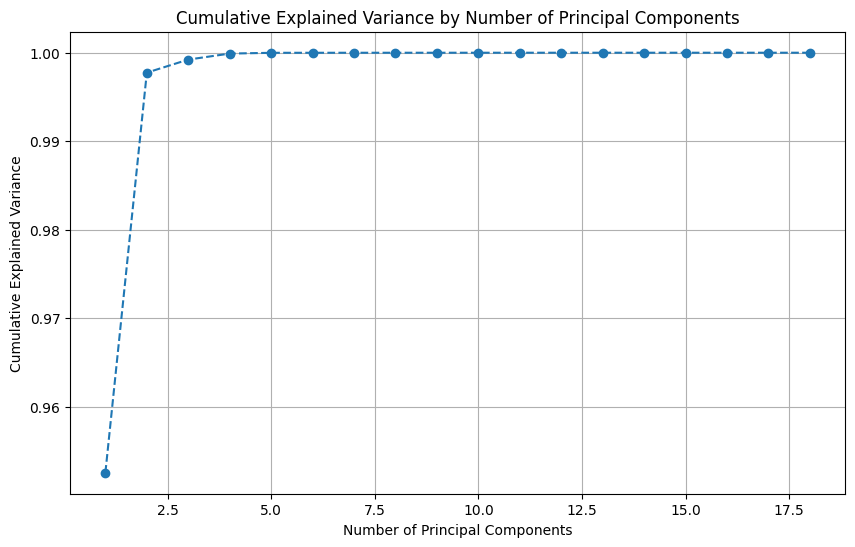

In [63]:
# Plot cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance by Number of Principal Components')
plt.grid()
plt.show()

**The graph shows a steep increase initially. This means the first few principal components explain a large portion of the variance in the data. For instance, the first 3-4 components seem to explain around 99% of the variance.**

# **Taking the number of Principal Components to 4**

In [64]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 4)
principal_components = pca.fit_transform(X_data)

**Using K-Means cluster to identify the number of clusters that can be plotted**

In [65]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
  kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,random_state = 0,n_init=10)
  kmeans.fit(principal_components)
  labels = kmeans.inertia_
  print('Cluster = ',i,'wcss value =',labels)
  wcss.append(labels)

Cluster =  1 wcss value = 2.2295216836272553
Cluster =  2 wcss value = 1.02509364466483
Cluster =  3 wcss value = 0.5391342988225347
Cluster =  4 wcss value = 0.29962238772657834
Cluster =  5 wcss value = 0.2077705904241155
Cluster =  6 wcss value = 0.15994779576517057
Cluster =  7 wcss value = 0.13319518649937445
Cluster =  8 wcss value = 0.1098336314870546
Cluster =  9 wcss value = 0.09449599711799189
Cluster =  10 wcss value = 0.08369148261197475


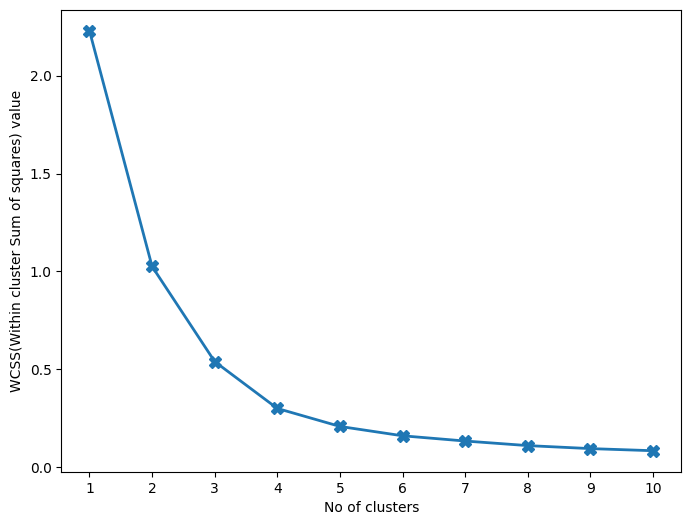

In [66]:
#displaying the value of WCSS as an Elbow
plt.figure(figsize=(8,6))
plt.plot(range(1,11),wcss,linewidth=2,markersize=8,marker='X')
plt.xlabel('No of clusters')
plt.ylabel('WCSS(Within cluster Sum of squares) value')
plt.xticks(np.arange(1,11,1))
plt.show()

**taking number of clusters as 4**

In [67]:
#
kmeans = KMeans(n_clusters=4,init='k-means++',max_iter=300,random_state = 0,n_init=15)
cluster_labels = kmeans.fit_predict(principal_components)
np.set_printoptions(threshold=np.inf)
cluster_labels

array([2, 0, 2, 0, 2, 2, 2, 0, 0, 2, 1, 2, 2, 3, 2, 0, 0, 2, 0, 0, 2, 2,
       0, 3, 2, 0, 2, 1, 0, 0, 0, 2, 0, 2, 3, 0, 2, 2, 3, 3, 2, 1, 2, 1,
       0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2,
       2, 2, 2, 2, 2, 0, 0, 2, 2, 0, 2, 0, 0, 3, 0, 2, 0, 0, 2, 2, 2, 2,
       2, 2, 0, 3, 0, 2, 2, 2, 2, 0, 0, 2, 2, 3, 2, 2, 0, 2, 2, 2, 2, 2,
       0, 2, 2, 0, 0, 3, 2, 0, 3, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       1, 0, 0, 0, 2, 2, 2, 2, 0, 2, 3, 0, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 0, 2, 3, 2, 0, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 0, 0, 2, 2,
       3, 2, 0, 0, 3, 0, 2, 2, 0, 3, 2, 0, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2,
       0, 3, 0, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 2, 0, 2, 0, 2, 2, 0, 2, 0,
       2, 2, 2, 0, 0, 2, 0, 3, 2, 3, 3, 2, 1, 2, 2, 3, 2, 2, 0, 2, 2, 2,
       2, 0, 0, 2, 0, 2, 0, 2, 0, 3, 0, 3, 2, 0, 0, 0, 0, 2, 0, 2, 3, 2,
       0, 2, 0, 0, 2, 2, 2, 2, 2, 3, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 2, 3,
       0, 2, 0, 0, 2, 2, 0, 2, 0, 0, 3, 2, 0, 2, 2,

In [68]:
X_data.head()

,Education,Income,Kidhome,Teenhome,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Living_status,Year_Customer,Spent
0,0.000000,0.999015,0.000000,0.000000,0.000997,0.000052,0.000137,0.000172,0.000069,0.000120,0.0,0.0,0.0,0.0,0.0,0.0,0.000017,0.001151,0.000000,0.034573,0.027786
1,0.000000,0.999055,0.000022,0.000022,0.000819,0.000043,0.000022,0.000022,0.000043,0.000108,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.001509,0.000000,0.043417,0.000582
2,0.000000,0.999546,0.000000,0.000000,0.000363,0.000014,0.000112,0.000028,0.000140,0.000056,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000823,0.000014,0.028097,0.010831
3,0.000000,0.997152,0.000037,0.000000,0.000973,0.000075,0.000075,0.000000,0.000150,0.000225,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.001497,0.000037,0.075368,0.001983
4,0.000017,0.999376,0.000017,0.000000,0.001612,0.000086,0.000086,0.000051,0.000103,0.000086,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000737,0.000017,0.034528,0.007235


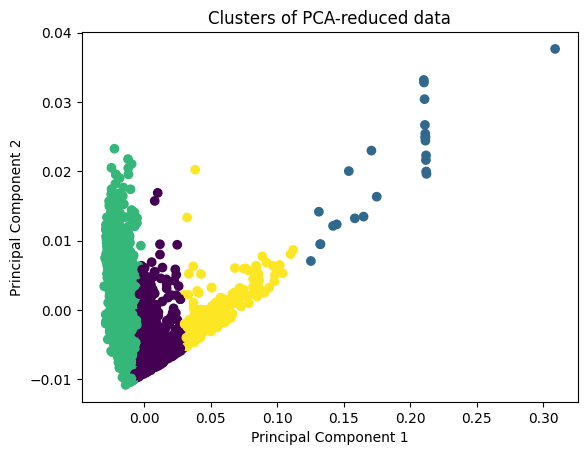

In [69]:

plt.scatter(principal_components[:, 0], principal_components[:, 1], c=cluster_labels, cmap='viridis')
plt.title('Clusters of PCA-reduced data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

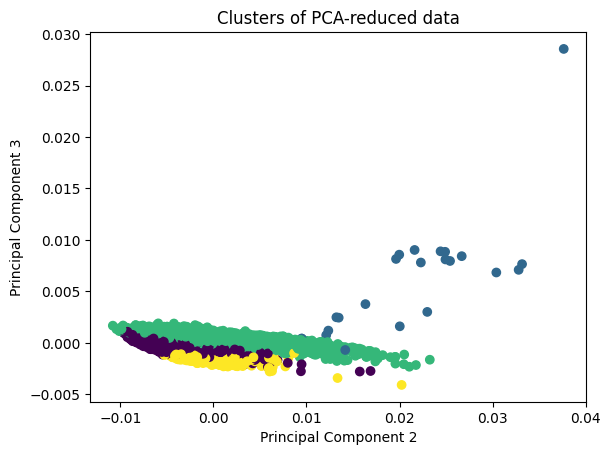

In [70]:
plt.scatter(principal_components[:, 1], principal_components[:, 2], c=cluster_labels, cmap='viridis')
plt.title('Clusters of PCA-reduced data')
plt.xlabel('Principal Component 2')
plt.ylabel('Principal Component 3')
plt.show()

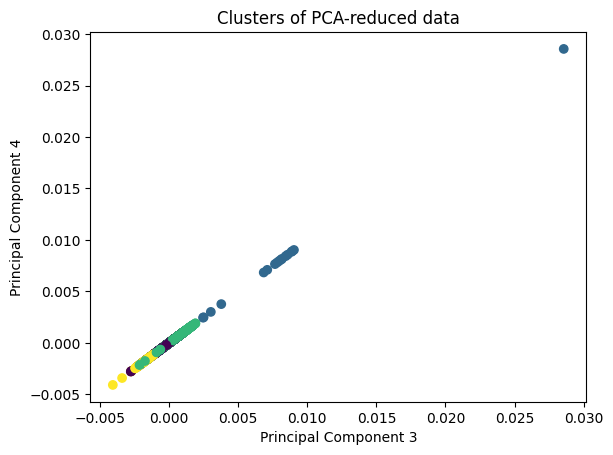

In [71]:
plt.scatter(principal_components[:, 2], principal_components[:, 2], c=cluster_labels, cmap='viridis')
plt.title('Clusters of PCA-reduced data')
plt.xlabel('Principal Component 3')
plt.ylabel('Principal Component 4')
plt.show()

<ipython-input-76-49f39fa42bfb>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl = sns.countplot(x=cluster_labels, palette= pal)


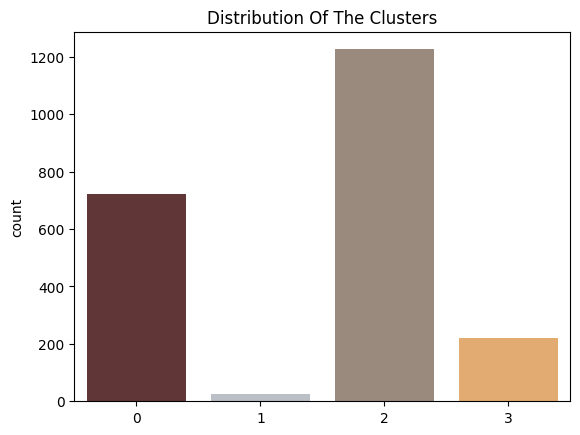

In [76]:
#Plotting countplot of clusters
pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60"]
pl = sns.countplot(x=cluster_labels, palette= pal)
pl.set_title("Distribution Of The Clusters")
plt.show()

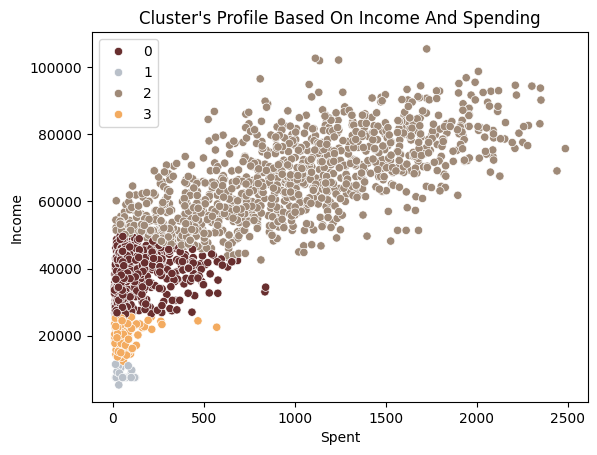

In [79]:
pl = sns.scatterplot(data = data,x=data["Spent"], y=data["Income"],hue=cluster_labels, palette= pal)
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()

Group 0 : They have Good Income , but spend less
Group 1: They have less income and spend less
Group 2: High Income, high spendin - but there ar also customers which spend less
Group 3: Less Income less spent

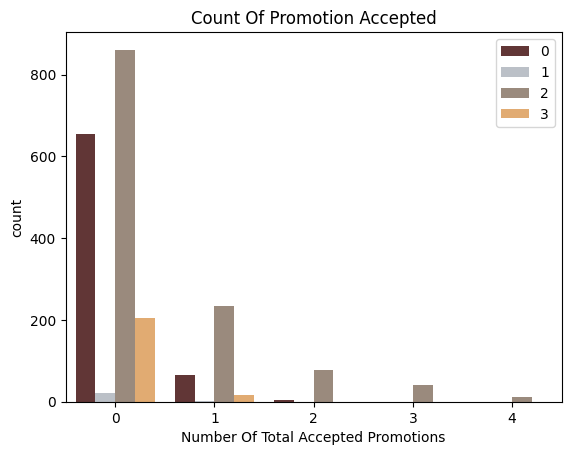

In [81]:
data["Total_Promos"] = data["AcceptedCmp1"]+ data["AcceptedCmp2"]+ data["AcceptedCmp3"]+ data["AcceptedCmp4"]+ data["AcceptedCmp5"]
#Plotting count of total campaign accepted.
plt.figure()
pl = sns.countplot(x=data["Total_Promos"],hue=cluster_labels, palette= pal)
pl.set_title("Count Of Promotion Accepted")
pl.set_xlabel("Number Of Total Accepted Promotions")
plt.show()